https://www.bilibili.com/video/BV1Xi421R7ev/?spm_id_from=333.337.search-card.all.click&vd_source=a0dab138978e49c265fbce6907b40d53

https://www.bilibili.com/video/BV1F1421B7iv/?spm_id_from=333.337.search-card.all.click&vd_source=a0dab138978e49c265fbce6907b40d53

https://www.youtube.com/watch?v=o29P0Kpobz0

https://www.youtube.com/watch?v=SMBkImDWOyQ

In [2]:
import torch
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# verify the syntax of slicing
a = torch.arange(0, 48)
a = a.view(2, 4, 6)
print(a)

u = a[..., :a.shape[-1] // 2]
v = a[..., a.shape[-1] // 2:]

# print(u)
# print(v)

y = torch.cat((-v, u), dim=-1)
print(y)

tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]],

        [[24, 25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34, 35],
         [36, 37, 38, 39, 40, 41],
         [42, 43, 44, 45, 46, 47]]])
tensor([[[ -3,  -4,  -5,   0,   1,   2],
         [ -9, -10, -11,   6,   7,   8],
         [-15, -16, -17,  12,  13,  14],
         [-21, -22, -23,  18,  19,  20]],

        [[-27, -28, -29,  24,  25,  26],
         [-33, -34, -35,  30,  31,  32],
         [-39, -40, -41,  36,  37,  38],
         [-45, -46, -47,  42,  43,  44]]])


In [41]:
# verify element-wise multiplication

# Define a 1D tensor with shape (4)
tensor_1 = torch.tensor([1, 2, 3, 4])  # Shape: (4)

# Define a 2D tensor with shape (4, 4)
tensor_2 = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])  # Shape: (4, 4)

# Perform element-wise multiplication using broadcasting
result = tensor_2 * tensor_1

print(result)


tensor([[ 1,  4,  9, 16],
        [ 5, 12, 21, 32],
        [ 9, 20, 33, 48],
        [13, 28, 45, 64]])


In [3]:
# verify outer product
position_ids = torch.tensor([1, 2, 3])  # Shape: (3,)
series = torch.tensor([1, 1/2, 1/4, 1/8])     # Shape: (2,)

result = torch.outer(position_ids, series)   # Shape: (3, 2)
print(result)

result2 = position_ids[:, None] * series[None, :]
print(result2)

print(position_ids[:, None])
print(series[None, :])


tensor([[1.0000, 0.5000, 0.2500, 0.1250],
        [2.0000, 1.0000, 0.5000, 0.2500],
        [3.0000, 1.5000, 0.7500, 0.3750]])
tensor([[1.0000, 0.5000, 0.2500, 0.1250],
        [2.0000, 1.0000, 0.5000, 0.2500],
        [3.0000, 1.5000, 0.7500, 0.3750]])
tensor([[1],
        [2],
        [3]])
tensor([[1.0000, 0.5000, 0.2500, 0.1250]])


In [18]:
def reverse_half(x):
    u = x[..., :x.shape[-1]//2]
    v = x[..., x.shape[-1]//2:]
    return torch.cat((-v, u), dim=-1)


In [102]:
base = 100
context_len = 4
d_model = 16
half_model = d_model / 2
freq = base ** (1 / half_model)


In [19]:
x = torch.randn((context_len, d_model))
print("x:\n", x)

y = reverse_half(x)
print("y:\n", y)

x:
 tensor([[-1.2206,  0.3716,  0.6011, -0.1863,  0.0716, -0.3650,  1.6415, -1.2403,
          0.2706,  0.3520,  1.0065, -0.3891, -0.2567,  0.0476,  0.9248,  0.1808],
        [-0.0880, -0.1656,  0.5035, -0.7204, -0.2507,  0.0621, -0.0177,  0.1530,
          0.9508,  0.2738,  0.2081,  0.0684,  0.6011,  0.2023,  0.9526, -0.6222],
        [-1.2642,  0.8646,  0.3085, -0.0483,  1.3096, -1.5231,  1.2942, -1.0518,
         -0.2256,  1.9010, -1.4294,  0.0236, -1.2226, -0.3120, -0.7778, -1.2564],
        [ 0.2436, -0.3870,  0.3236,  0.7501,  1.4971, -0.3691,  0.2366, -0.5028,
         -0.2317,  0.5437,  0.6165,  1.0460,  0.6974, -0.6152, -1.4082,  0.8264]])
y:
 tensor([[-0.2706, -0.3520, -1.0065,  0.3891,  0.2567, -0.0476, -0.9248, -0.1808,
         -1.2206,  0.3716,  0.6011, -0.1863,  0.0716, -0.3650,  1.6415, -1.2403],
        [-0.9508, -0.2738, -0.2081, -0.0684, -0.6011, -0.2023, -0.9526,  0.6222,
         -0.0880, -0.1656,  0.5035, -0.7204, -0.2507,  0.0621, -0.0177,  0.1530],
        [ 0.2

In [1]:
# rotary position encoding

base = 10
context_len = 4
d_model = 16
half_model = d_model // 2
freq = base ** (1 / half_model)

position_ids = torch.arange(0, context_len)
print("position_ids.shape:", position_ids.shape)
      
theta_base = 1.0 / (freq ** torch.arange(0, half_model))
print("theta_base.shape:", theta_base.shape)

thetas = position_ids.outer(theta_base)
# thetas = position_ids[:, None] * theta_base[None, :]
print("thetas.shape:", thetas.shape)


full_thetas = torch.cat((thetas, thetas), dim=-1)
print("full_thetas.shape:", full_thetas.shape)
print("full_thetas:\n", full_thetas)

cos = torch.cos(full_thetas)
sin = torch.sin(full_thetas)
print("cos.shape:", cos.shape)
print("sin.shape:", sin.shape)

out = x * cos + y * sin
print("out.shape:", out.shape)
print("out:\n", out)




NameError: name 'torch' is not defined

To use LaTex in matplotlib, you need to install miktex and add the path to the miktex bin folder to the system environment variable path:

1. Install miktex https://miktex.org/, make sure to run check update during the installation, or run MikTeX Console to update the package after the installation.
2. The setup add path to current user's path environment variable:

$env:path
C:\Users\georgel\AppData\Local\Programs\MiKTeX\miktex\bin\x64\

3. Modify the system environment variable path and add the path to the miktex bin folder.
4. Start a new cmd command prompt and launch vs code again.

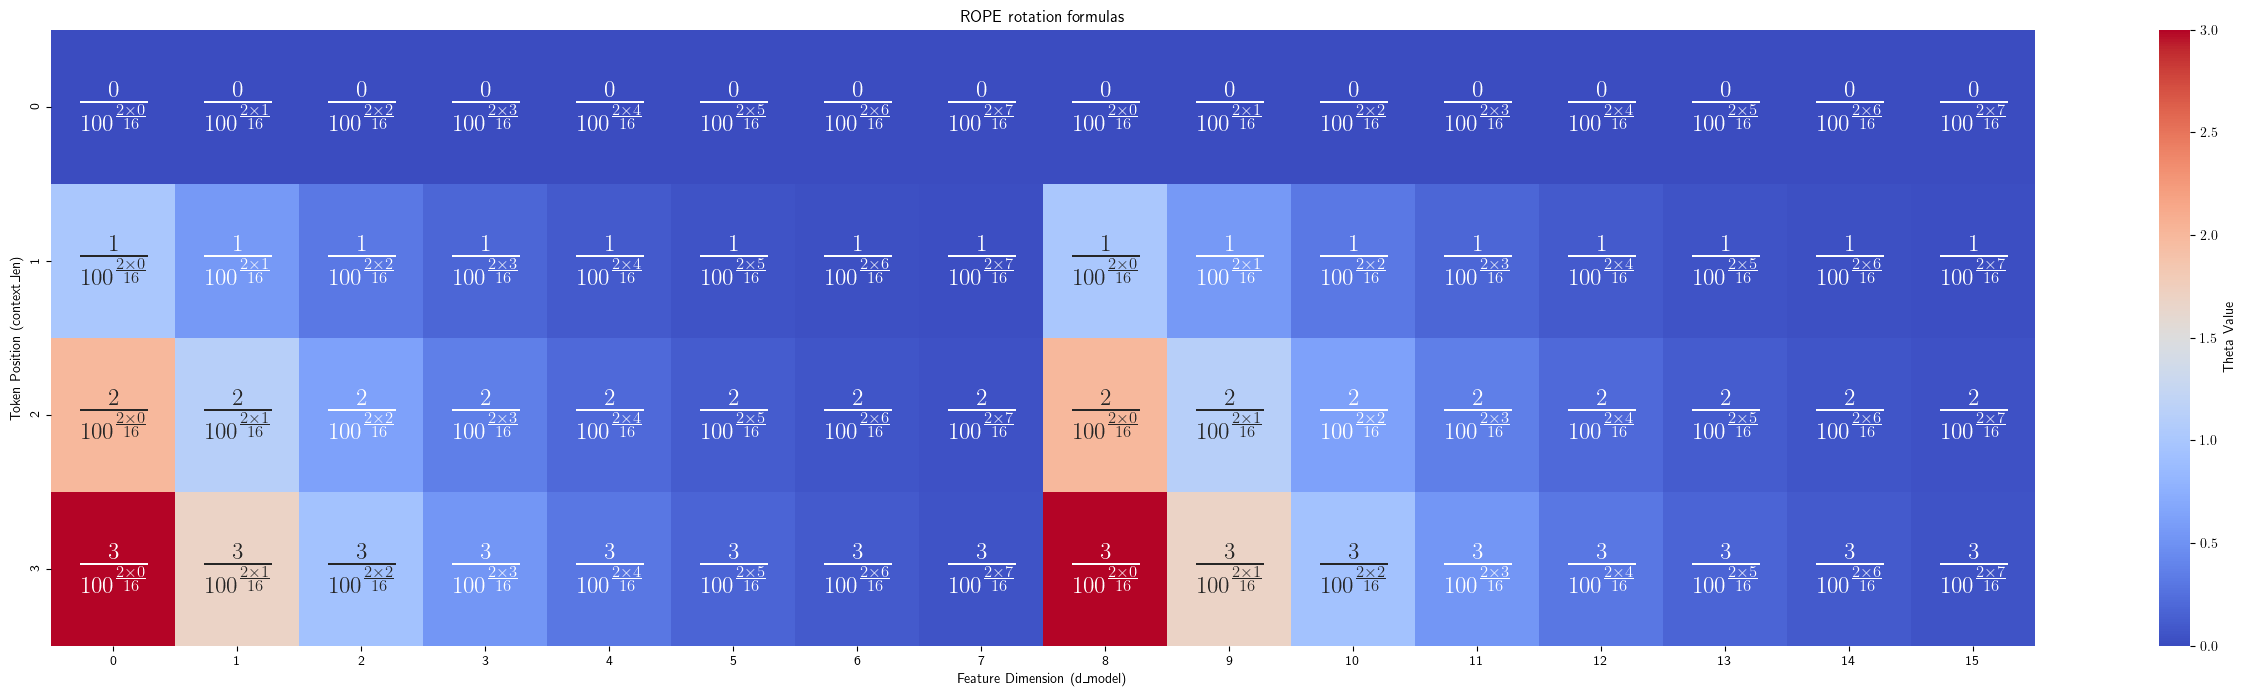

In [33]:
# Enable LaTeX rendering in Matplotlib
plt.rcParams["text.usetex"] = True

# Constants
base = 100
context_len = 4
d_model = 16
half_model = d_model // 2
freq = base ** (1 / half_model)

# Compute `full_thetas`
position_ids = torch.arange(0, context_len)
theta_base = 1.0 / (freq ** torch.arange(0, half_model))
thetas = position_ids[:, None] * theta_base[None, :]
full_thetas = torch.cat((thetas, thetas), dim=-1)

# Convert to NumPy for Seaborn compatibility
full_thetas_np = full_thetas.numpy()

# Create LaTeX-style annotations with the new formula
annotations = np.empty_like(full_thetas_np, dtype=object)
for i in range(context_len):
    for j in range(d_model):
        pos = position_ids[i].item()
        theta_index = j % half_model
        annotations[i, j] = rf"$\frac{{{pos}}}{{{base}^{{\frac{{2 \times {theta_index}}}{{{d_model}}}}}}}$"

# Plot the heatmap with LaTeX-style annotations and enlarged font size
plt.figure(figsize=(32, 8))
sns.heatmap(
    full_thetas_np,
    annot=annotations,  # Display formulas
    fmt="",  # Keep annotations as raw text
    cmap="coolwarm",
    cbar_kws={"label": "Theta Value"},  # Colorbar label
    xticklabels=range(d_model),  # Feature dimension labels
    yticklabels=range(context_len),  # Position labels
    annot_kws={"size": 24}  # Enlarge font size of annotations
)
plt.title(r"ROPE rotation formulas")
plt.xlabel("Feature Dimension (d_model)")
plt.ylabel("Token Position (context_len)")
plt.show()


In [42]:
print(full_thetas)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.5623, 0.3162, 0.1778, 0.1000, 0.0562, 0.0316, 0.0178, 1.0000,
         0.5623, 0.3162, 0.1778, 0.1000, 0.0562, 0.0316, 0.0178],
        [2.0000, 1.1247, 0.6325, 0.3557, 0.2000, 0.1125, 0.0632, 0.0356, 2.0000,
         1.1247, 0.6325, 0.3557, 0.2000, 0.1125, 0.0632, 0.0356],
        [3.0000, 1.6870, 0.9487, 0.5335, 0.3000, 0.1687, 0.0949, 0.0533, 3.0000,
         1.6870, 0.9487, 0.5335, 0.3000, 0.1687, 0.0949, 0.0533]])


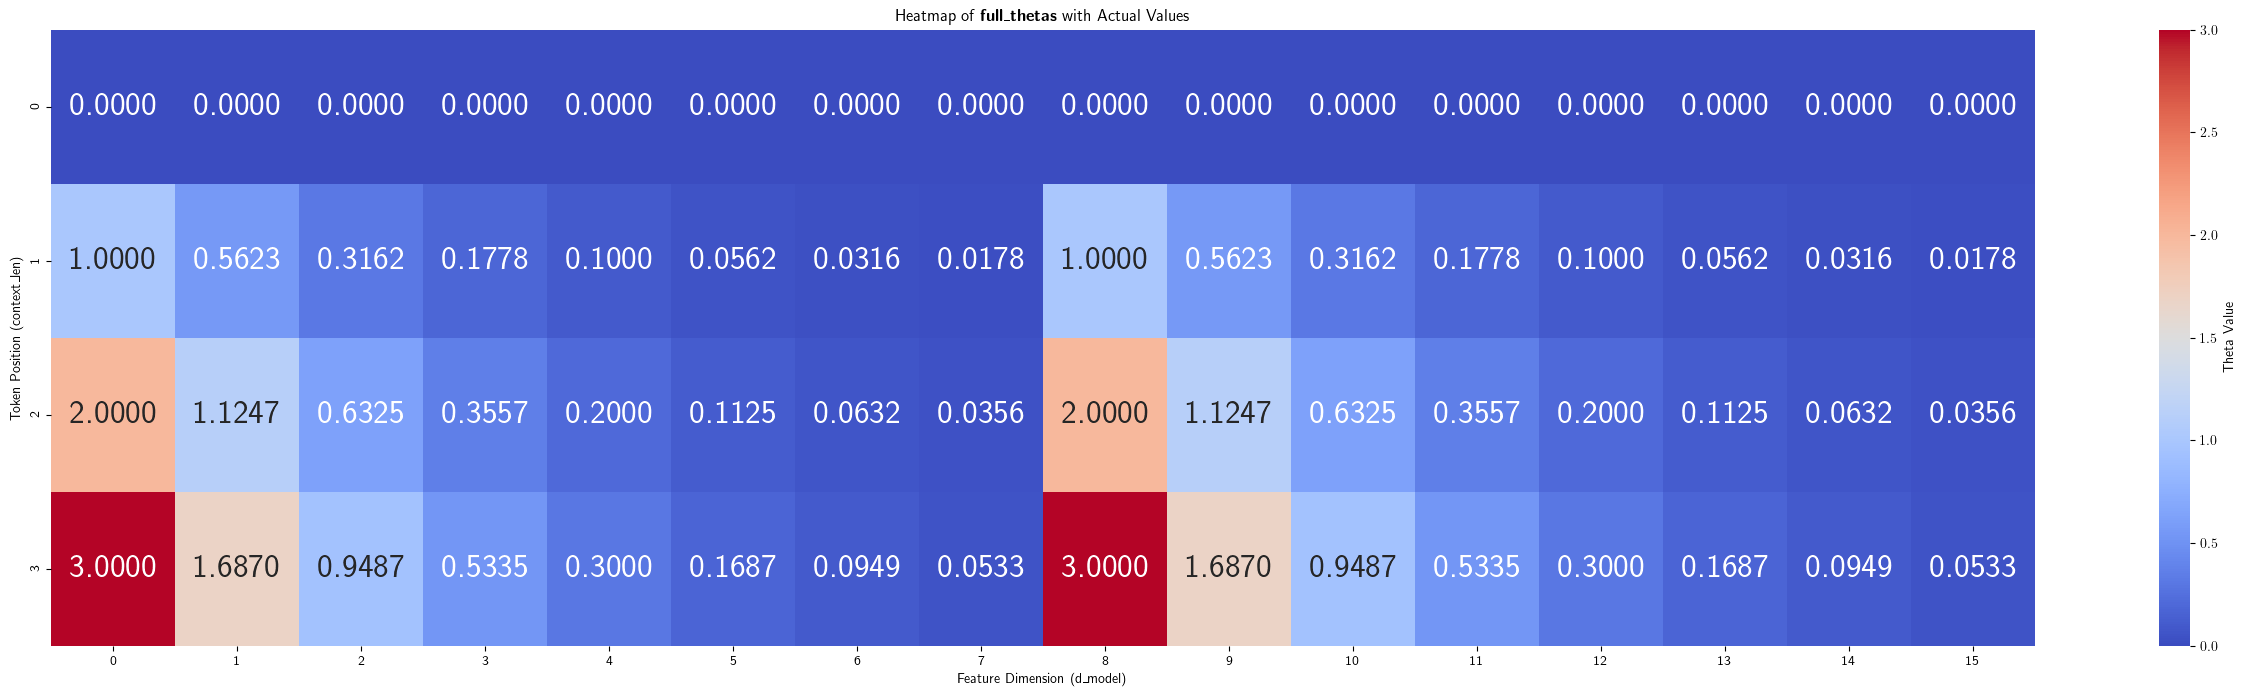

In [ ]:

# Enable LaTeX rendering in Matplotlib
plt.rcParams["text.usetex"] = True

# Constants
base = 100
context_len = 4
d_model = 16
half_model = d_model // 2
freq = base ** (2 / d_model)  # Compute freq value

# Compute `full_thetas`
position_ids = torch.arange(0, context_len)
theta_base = 1.0 / (freq ** torch.arange(0, half_model))
thetas = position_ids[:, None] * theta_base[None, :]
full_thetas = torch.cat((thetas, thetas), dim=-1)

# Convert to NumPy for Seaborn compatibility
full_thetas_np = full_thetas.numpy()

# Create annotations with the actual values of `full_thetas`
annotations = np.empty_like(full_thetas_np, dtype=object)
for i in range(context_len):
    for j in range(d_model):
        # Format the value of full_thetas[i, j] to display
        annotations[i, j] = f"{full_thetas_np[i, j]:.4f}"  # Display with 2 decimal places

# Plot the heatmap with the actual values of `full_thetas` in annotations and enlarged font size
plt.figure(figsize=(32, 8))
sns.heatmap(
    full_thetas_np,
    annot=annotations,  # Display the actual values of full_thetas
    fmt="",  # Keep annotations as raw text
    cmap="coolwarm",
    cbar_kws={"label": "Theta Value"},  # Colorbar label
    xticklabels=range(d_model),  # Feature dimension labels
    yticklabels=range(context_len),  # Position labels
    annot_kws={"size": 24}  # Enlarge font size of annotations
)
plt.title(r"Heatmap of $\textbf{full\_thetas}$ with Actual Values")
plt.xlabel("Feature Dimension (d_model)")
plt.ylabel("Token Position (context_len)")
plt.show()
